In [59]:
import pandas as pd
df = pd.read_csv('data.csv')

In [60]:
len(df)

14688

In [19]:
df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [61]:
df[['Title', 'Cited by', 'Year']].sort_values(['Cited by'], ascending=[False])

,Title,Cited by,Year
10359,COVID-19 and mental health: A review of the ex...,2488,2020
935,“So what if ChatGPT wrote it?” Multidisciplina...,2470,2023
14359,Misinformation and Its Correction: Continued I...,2223,2012
14664,Information credibility on Twitter,2174,2011
13447,The spreading of misinformation online,1604,2016
...,...,...,...
2056,'Ensemble Incremental Model' for Misinformatio...,0,2023
2055,KG-IGNN: Knowledge Guided Inductive Graph Neur...,0,2023
9558,"""Is cybermedicine killing you?"" - A response f...",0,2021
2054,Bots Gone Rogue: Exploring the Negative Outcom...,0,2023


In [62]:
top_citations = df[df['Cited by'] > 50]
len(top_citations)

1459

In [63]:
top_citations.sort_values('Cited by', ascending=[False])['Title'].head(50)

10359    COVID-19 and mental health: A review of the ex...
935      “So what if ChatGPT wrote it?” Multidisciplina...
14359    Misinformation and Its Correction: Continued I...
14664                   Information credibility on Twitter
13447               The spreading of misinformation online
12676    Defining “Fake News”: A typology of scholarly ...
14621    Why do humans reason? Arguments for an argumen...
10311    Vaccine hesitancy: the next challenge in the f...
9840                   The COVID-19 social media infodemic
10460    Fighting COVID-19 Misinformation on Social Med...
8481     Measuring the impact of COVID-19 vaccine misin...
10698    Response to COVID-19 in Taiwan: Big Data Analy...
11593    Systematic Literature Review on the Spread of ...
12891    Beyond Misinformation: Understanding and Copin...
10577    Suicide risk and prevention during the COVID-1...
12840    Mind the Hype: A Critical Evaluation and Presc...
14508                 Opioid epidemic in the united stat

In [92]:
def word_density(word):
    with_pol = pd.DataFrame(
        df[df['Abstract'].str.contains(word, case=False)].groupby('Year')['Abstract'].count()
    )
    counts = pd.DataFrame(df.groupby('Year')['Abstract'].count())
    merged = with_pol.merge(counts, on='Year')
    final = merged['Abstract_x']/merged['Abstract_y']
    final.plot.line()

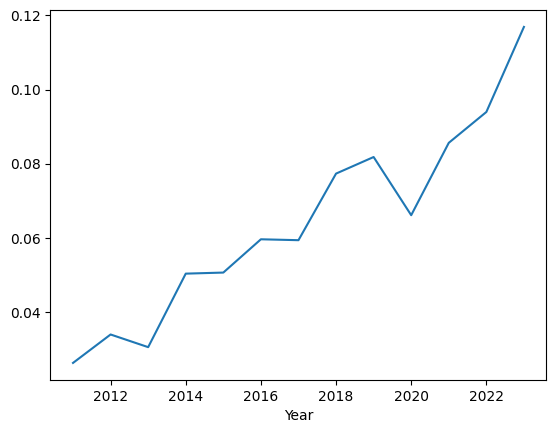

In [157]:
word_density('detection')

In [112]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

import string

def clean_abstract(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    new_text = []
    for word in text.split():
        if word not in (stop):
            new_text.append(word)
    return ' '.join(new_text)

df['abstract_cleaned'] = df['Abstract'].apply(clean_abstract)
df['abstract_cleaned']

0        During public health crises public trust essen...
1        Infectious disease outbreaks COVID19 pandemic ...
2        In 2019 United Kingdom UK lost measles free st...
3        This work analyzes role images vehicle spread ...
4        Objective This study carried determine percept...
                               ...                        
14683    Witnesses discuss event others often incorpora...
14684    This study compared adults assess credibility ...
14685    This paper established new direction researche...
14686    People remember different details events discu...
14687    Objective To assess racial differences attitud...
Name: abstract_cleaned, Length: 14688, dtype: object

In [117]:
df[['abstract_cleaned', 'Year']].to_csv('abstract_cleaned_per_year.csv')

In [154]:
import os
from py_allotax.generate_svg import generate_svg
import csv
import shifterator as sh

data = None
new = []
old = []

with open('abstract_cleaned_per_year.csv', 'r') as f:
    data = csv.reader(f)
    for i, row in enumerate(data):
        if i == 0:
            continue
        text = row[1]
        year = row[2]

        if int(year) > 2016 and int(year) < 2020:
            new.append(text)
        elif int(year) <= 2016:
            old.append(text)

new = ' '.join(new)
old = ' '.join(old)


In [155]:
junk = [str(2010 + i) for i in range(15)]
junk.extend(['©', 'Elsevier'])

from nltk import tokenize, FreqDist, bigrams
new = FreqDist([word.lower() for word in new.split() if word not in stopwords.words('english') and word not in junk])
old = FreqDist([word.lower() for word in old.split() if word not in stopwords.words('english') and word not in junk])


AttributeError: 'YTick' object has no attribute 'label'

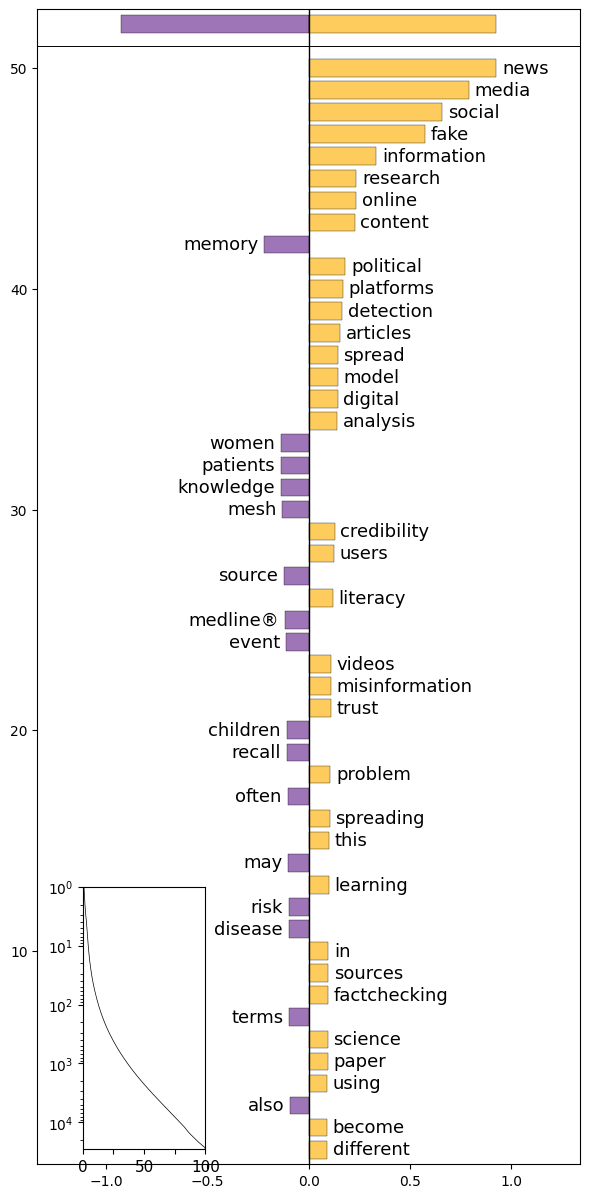

In [156]:
import shifterator as sh
proportion_shift = sh.ProportionShift(type2freq_1=old,
                                      type2freq_2=new)
proportion_shift.get_shift_graph()